In [1]:
import pandas as pd
df=pd.read_csv("phishing.csv.zip")
import numpy as np
from sklearn.model_selection import train_test_split
df.shape

(10000, 50)

In [2]:
X = df.drop(columns=['CLASS_LABEL']) # drop the target variable column
y = df['CLASS_LABEL']

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Assuming you have your features in X and labels in y

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train your classifier
classifier = SVC()
classifier.fit(X_train, y_train)

# Make predictions on both train and test sets
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Create the confusion matrix for train set
cm_train = confusion_matrix(y_train, y_train_pred)

# Create the confusion matrix for test set
cm_test = confusion_matrix(y_test, y_test_pred)

print("Confusion matrix for train set:")
print(cm_train)

print("\nConfusion matrix for test set:")
print(cm_test)


Confusion matrix for train set:
[[4012    0]
 [   6 3982]]

Confusion matrix for test set:
[[ 988    0]
 [   2 1010]]


In [4]:
correlation_matrix = df.corr()

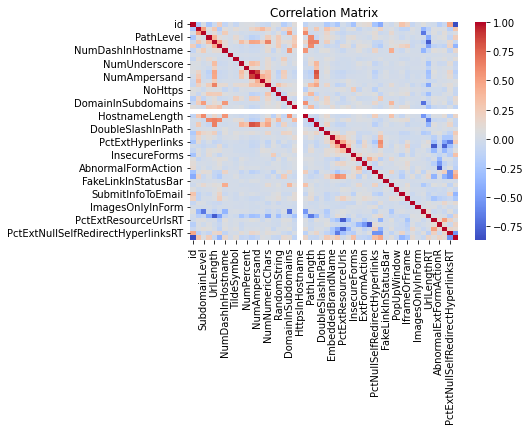

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
# Generate the heatmap
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')

# Set the plot title
plt.title('Correlation Matrix')

# Display the plot
plt.show()

<AxesSubplot:>

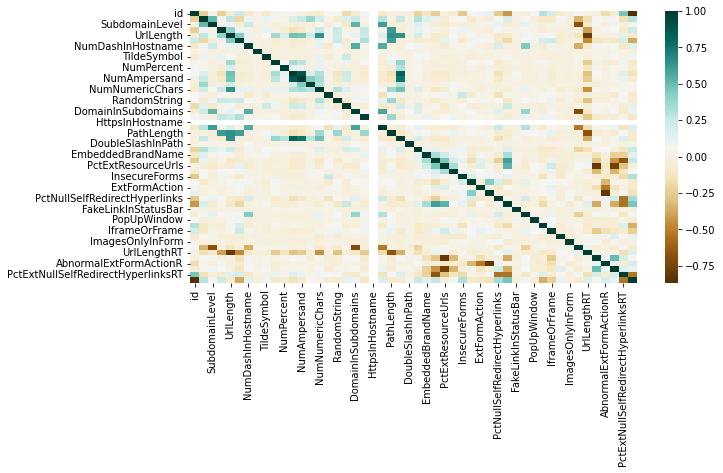

In [6]:
plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix,cmap="BrBG")

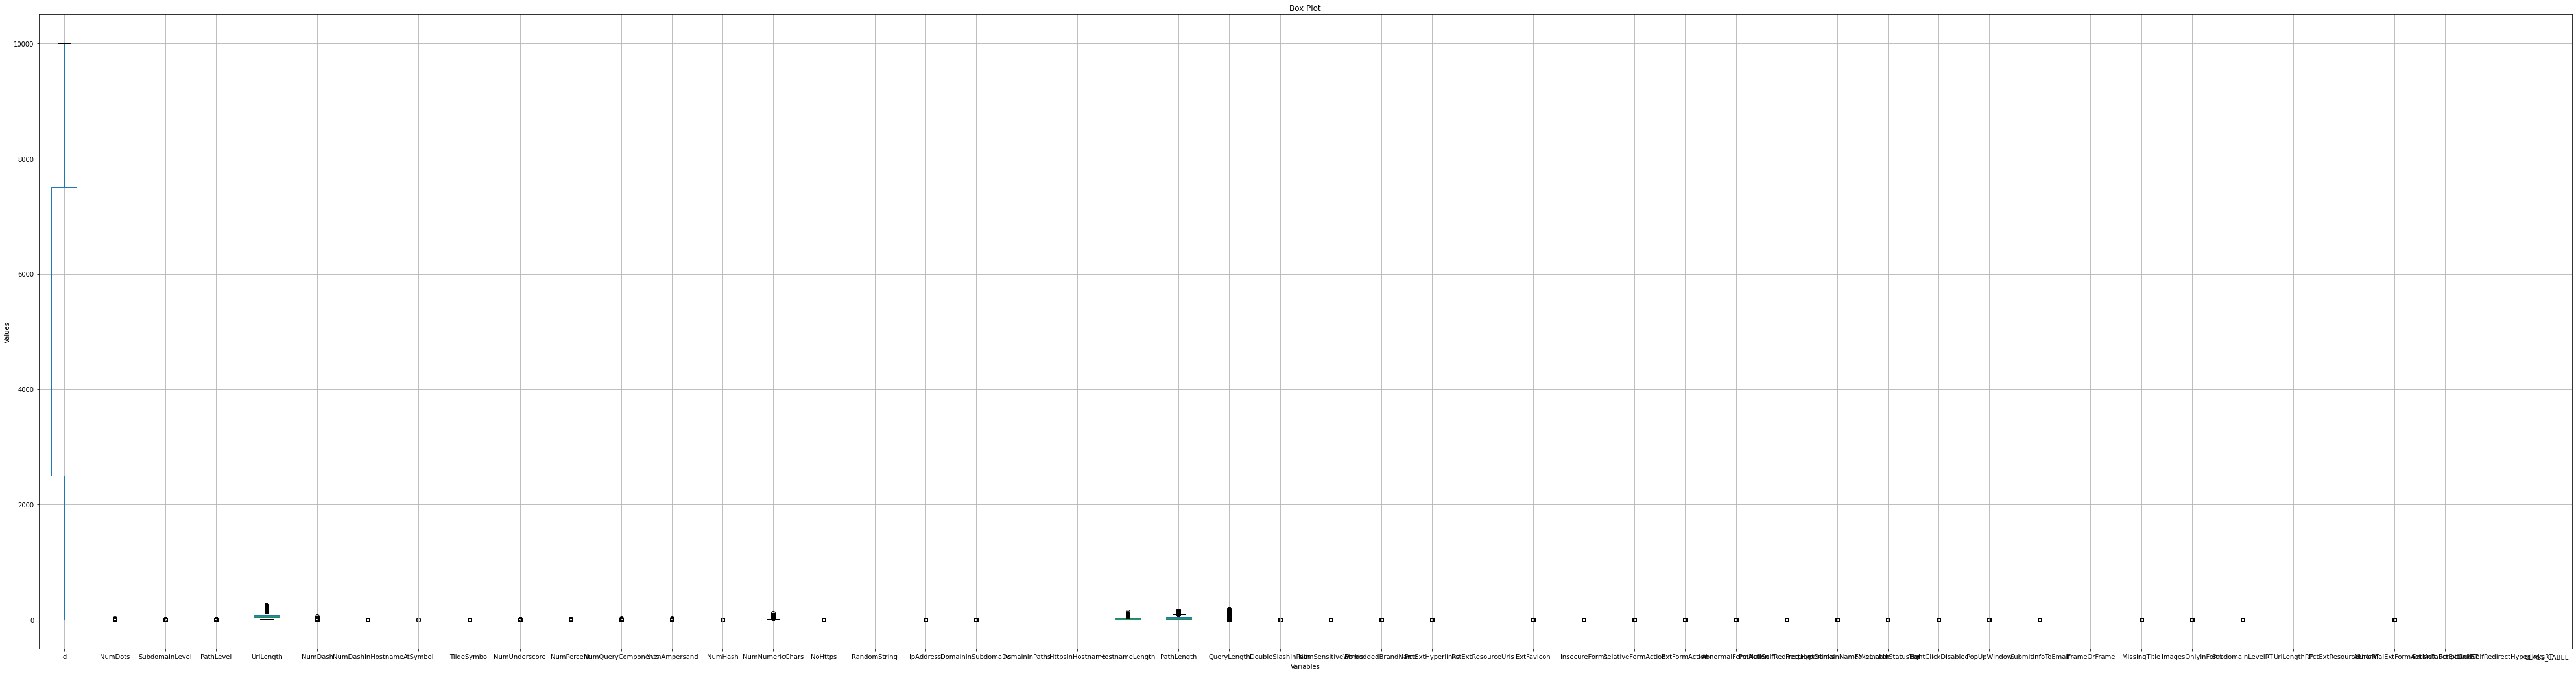

In [7]:
import matplotlib.pyplot as plt

# Create a box plot for the dataframe
plt.figure(figsize=(70, 18))  # Optional: Set the figure size
df.boxplot()

# Optional: Set the title and labels for the plot
plt.title("Box Plot")
plt.xlabel("Variables")
plt.ylabel("Values")

# Display the plot
plt.show()


In [8]:
#scatter_matrix = pd.plotting.scatter_matrix(df, figsize=(25, 25))

# Set labels and titles for each subplot
#for ax in scatter_matrix.ravel():
#    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=0)
#    ax.set_ylabel(ax.get_ylabel(), fontsize=8, rotation=45)
#    ax.set_title(ax.get_title(), fontsize=10)

# Adjust the spacing between subplots
#plt.tight_layout()

# Show the scatter plots
#plt.show()

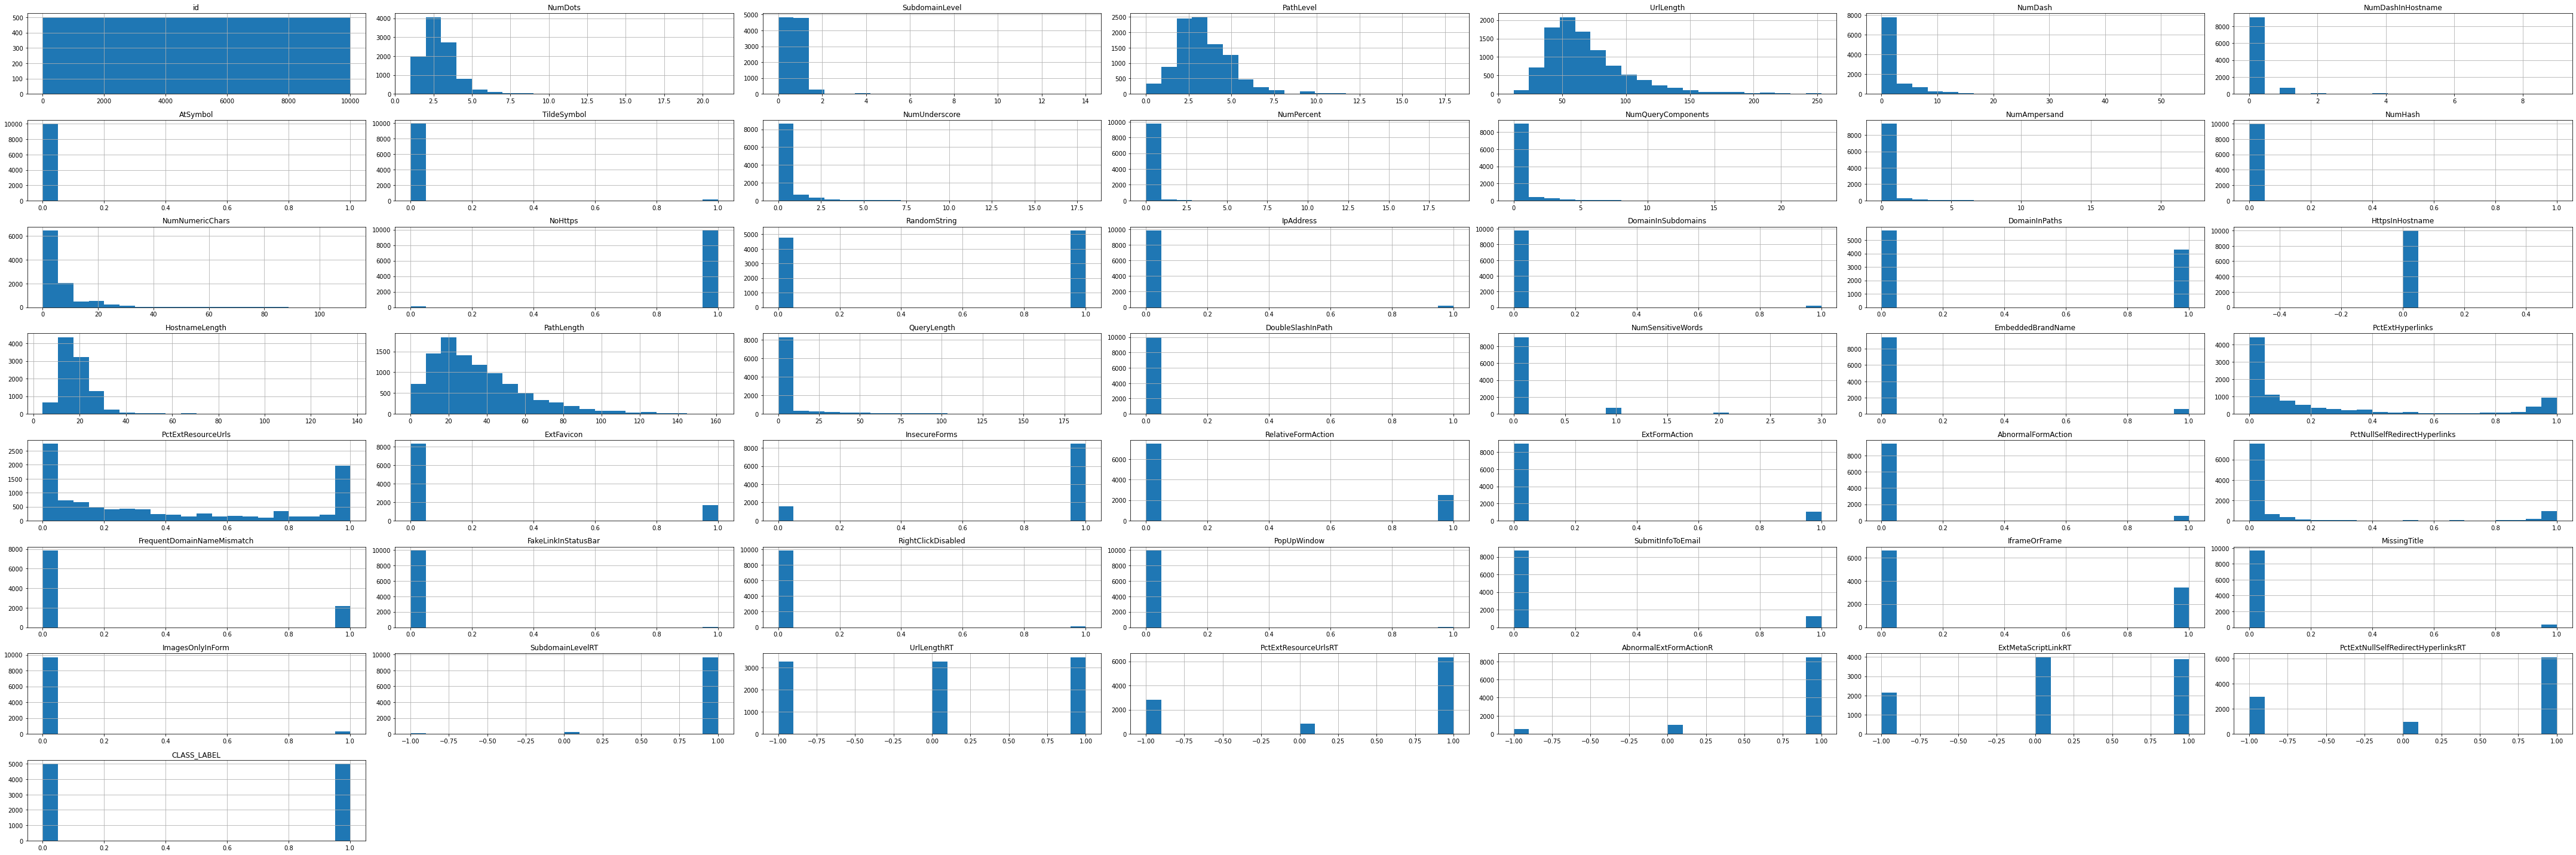

In [9]:
# Histograms of numerical features
df.hist(figsize=(60, 20), bins=20)
plt.tight_layout()
plt.show()


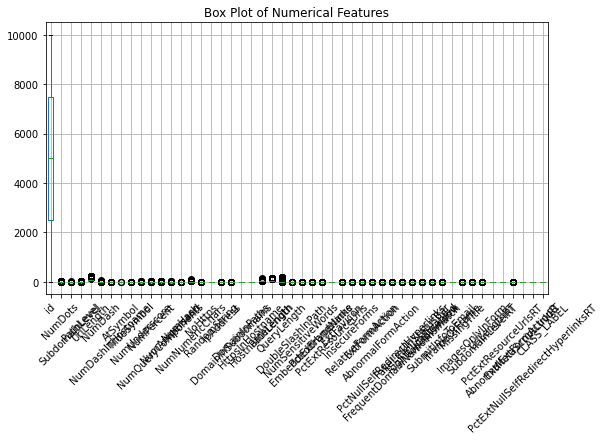

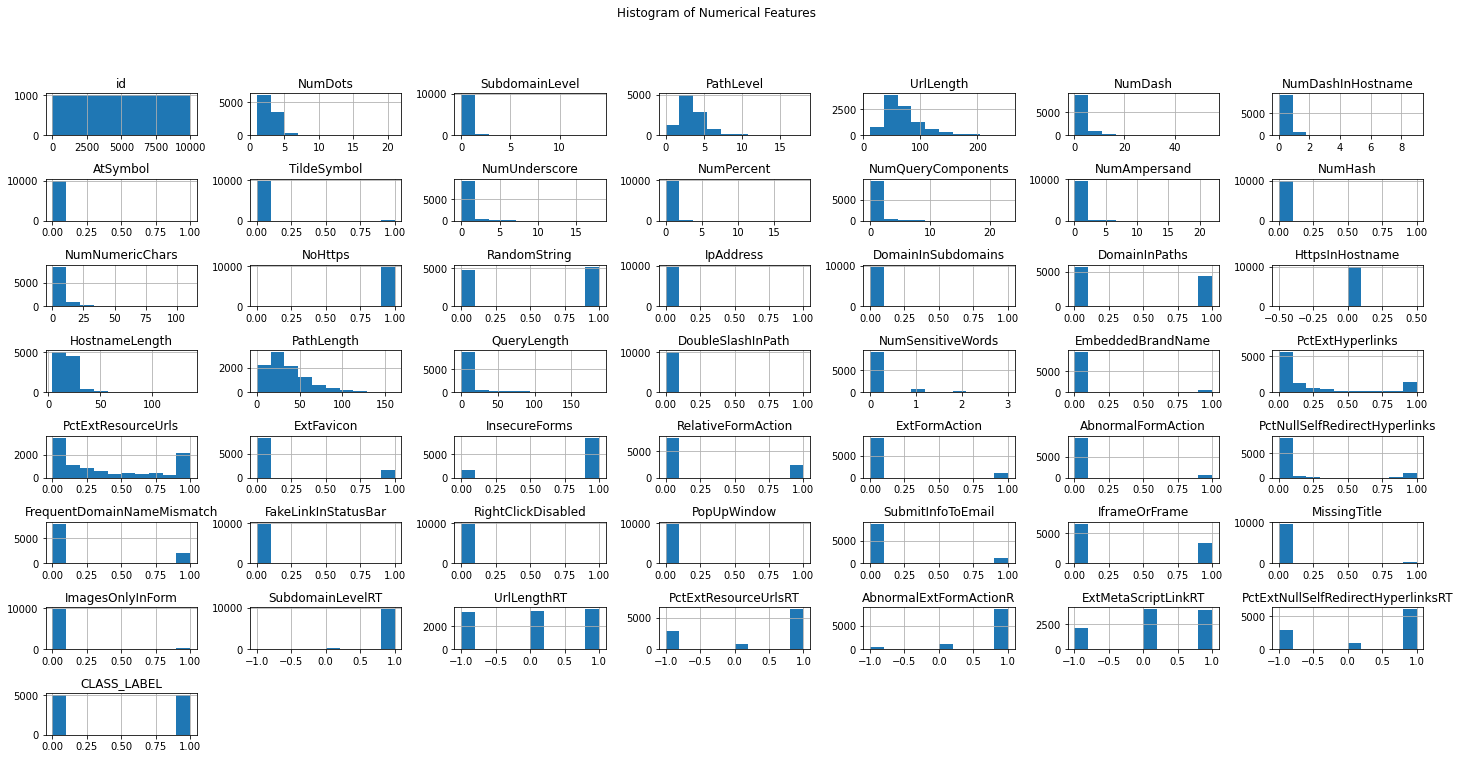

In [10]:

# Box plot of numerical features
df.boxplot(figsize=(9, 5))
plt.title('Box Plot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

# Histogram of numerical features
df.hist(figsize=(20, 10))
plt.suptitle('Histogram of Numerical Features', y=1.05)
plt.tight_layout()
plt.show()

In [11]:
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    sns.countplot(x=col, data=df)
    plt.title(f'Bar Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

# Correlation matrix heatmap
#corr_matrix = df.corr()
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
#plt.title('Correlation Matrix Heatmap')
#plt.show()

# Scatter plot matrix of numerical features
#num_cols = df.select_dtypes(include='number').columns
#sns.pairplot(df[num_cols])
#plt.suptitle('Scatter Plot Matrix of Numerical Features', y=1.02)
#plt.show()

In [12]:
null_values = df.isnull().sum()
# Print the number of null values for each column
print(null_values)

id                                    0
NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0


In [13]:
import pandas as pd
from sklearn.decomposition import PCA
# Initialize PCA with 10 components
pca = PCA(n_components=10)

# Fit and transform the data using PCA
X_pca = pca.fit_transform(X)

# Create a new DataFrame with the PCA components as features
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])

# Add the target variable back to the new DataFrame
df_pca['target'] = y
df_pca
# Save the new DataFrame as a CSV file
df_pca.to_csv('data_pca.csv', index=False)
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,target
0,-4999.499181,-2.372233,-12.333266,0.553093,-6.228132,-1.644159,0.149876,-0.040193,-0.519637,0.016449,1
1,-4998.556725,91.863567,81.431165,-5.222243,17.323660,1.768167,1.440950,-1.018053,-0.590469,-3.206120,1
2,-4997.491003,-21.643948,1.857566,7.990810,-3.947999,0.631220,-1.480158,-0.282003,1.255884,-0.146123,1
3,-4996.504197,5.783190,-16.669842,1.520161,-7.415075,-1.562067,0.891640,0.558619,-0.385281,0.225072,1
4,-4995.480675,-29.395552,-1.636114,-11.411328,-0.256275,0.240004,-0.425163,1.295935,1.855692,-0.028448,1


In [14]:

null_values = df_pca.isnull().sum()

# Print the number of null values for each column
print(null_values)

# check the data types of the columns

print(df_pca.dtypes)
# convert a string column to an integer type
df_pca['target'] = df_pca['target'].astype(float)
print(df_pca.dtypes)

PC1       0
PC2       0
PC3       0
PC4       0
PC5       0
PC6       0
PC7       0
PC8       0
PC9       0
PC10      0
target    0
dtype: int64
PC1       float64
PC2       float64
PC3       float64
PC4       float64
PC5       float64
PC6       float64
PC7       float64
PC8       float64
PC9       float64
PC10      float64
target      int64
dtype: object
PC1       float64
PC2       float64
PC3       float64
PC4       float64
PC5       float64
PC6       float64
PC7       float64
PC8       float64
PC9       float64
PC10      float64
target    float64
dtype: object


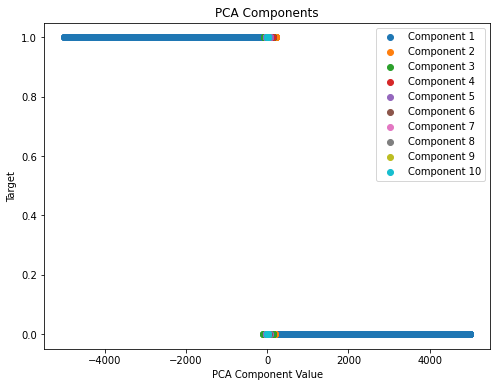

In [15]:
import matplotlib.pyplot as plt

# Assuming your PCA components and target column are stored in a DataFrame called 'data'
pca_components = df_pca.iloc[:, :10]  # Extracting the first 10 PCA components
target = df_pca['target']  # Assuming the target column is named 'target'

# Plotting the PCA components
plt.figure(figsize=(8, 6))
for i in range(10):
    plt.scatter(pca_components.iloc[:, i], target, label=f'Component {i+1}')
plt.xlabel('PCA Component Value')
plt.ylabel('Target')
plt.title('PCA Components')
plt.legend()
plt.show()


In [16]:

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [17]:
import numpy as np

def linear_regression(X_train, y_train, X_test):
    # Add a column of ones to X_train for the bias term
    X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]

    # Compute the weights using the normal equation
    weights = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

    # Add a column of ones to X_test for the bias term
    X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]

    # Predict the target variable for the test set
    y_pred = X_test.dot(weights)

    return y_pred

# Example usage:
# Assuming you have X_train, y_train, X_test, and y_test defined

# Perform linear regression
predictions = linear_regression(X_train, y_train, X_test)

# Calculate mean squared error
mse = np.mean((predictions - y_test) ** 2)
print("Mean Squared Error:", mse)
accuracy = 1 - mse/np.var(y_test)

print(f"Accuracy: {accuracy}")


Mean Squared Error: 0.04675602619367942
Accuracy: 0.8129489598755044


In [18]:
import numpy as np

class LinearRegression:
    def __init__(self):
        self.weights = None

    def fit(self, X_train, y_train):
        # Add a column of ones to X_train for the bias term
        X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]

        # Compute the weights using the normal equation
        self.weights = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

    def predict(self, X_test):
        # Add a column of ones to X_test for the bias term
        X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]

        # Predict the target variable for the test set
        y_pred = X_test.dot(self.weights)

        return y_pred

# Example usage:
# Assuming you have X_train, y_train, X_test, and y_test defined

# Create a LinearRegression object
linear_reg = LinearRegression()

# Fit the model to the training data
linear_reg.fit(X_train, y_train)

# Perform predictions on the test data
predictions = linear_reg.predict(X_test)

# Calculate mean squared error
mse = np.mean((predictions - y_test) ** 2)
print("Mean Squared Error:", mse)
accuracy = 1 - mse/np.var(y_test)

print(f"Accuracy: {accuracy}")

Mean Squared Error: 0.04675602619367942
Accuracy: 0.8129489598755044


In [19]:
from sklearn import preprocessing
import numpy as np

# Convert y_train and y_test to numpy arrays and reshape
y_train_array = y_train.values.reshape(-1, 1)
y_test_array = y_test.values.reshape(-1, 1)

# Normalize X_train and X_test
scaler_X = preprocessing.MinMaxScaler()
X_train_normalized = scaler_X.fit_transform(X_train)
X_test_normalized = scaler_X.transform(X_test)

# Normalize y_train and y_test
scaler_y = preprocessing.MinMaxScaler()
y_train_normalized = scaler_y.fit_transform(y_train_array).flatten()
y_test_normalized = scaler_y.transform(y_test_array).flatten()

# Print the normalized datasets
print("Normalized X_train:\n", X_train_normalized)
print("Normalized X_test:\n", X_test_normalized)
print("Normalized y_train:\n", y_train_normalized)
print("Normalized y_test:\n", y_test_normalized)



Normalized X_train:
 [[0.92548591 0.10625092 0.44540528 ... 0.38494025 0.45500805 0.34954453]
 [0.156038   0.1008818  0.41512358 ... 0.44029396 0.59503418 0.34360738]
 [0.16693906 0.1520787  0.3891139  ... 0.41110078 0.472974   0.35490899]
 ...
 [0.53901032 0.18774195 0.37161908 ... 0.36164646 0.48328981 0.36158178]
 [0.08592381 0.13198366 0.40294025 ... 0.32962279 0.47435448 0.34932377]
 [0.72704643 0.19570827 0.46003418 ... 0.35535203 0.52285494 0.33613268]]
Normalized X_test:
 [[0.62522716 0.20140542 0.34815308 ... 0.38349336 0.47838588 0.35784996]
 [0.46839586 0.24863587 0.34482485 ... 0.46364437 0.71065977 0.36475917]
 [0.17303921 0.20326703 0.36481906 ... 0.28606259 0.39705828 0.35941512]
 ...
 [0.78535753 0.21497825 0.35930858 ... 0.32008435 0.43173251 0.34990991]
 [0.10942592 0.27745498 0.30424015 ... 0.29162911 0.37982885 0.36280708]
 [0.69293872 0.27266667 0.59760159 ... 0.38437444 0.45664151 0.42031583]]
Normalized y_train:
 [0. 1. 1. ... 0. 1. 0.]
Normalized y_test:
 [0. 1.

In [20]:
class LinearRegression:
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # Initialize the weights and bias to zeros
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Gradient descent
        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)
            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred
lr = LinearRegression(lr=0.01, n_iters=1000)
lr.fit(X_train_normalized, y_train_normalized)

# Make predictions on the test data
y_pred = lr.predict(X_test_normalized)

# Evaluate the model on the test data
mse = np.mean((y_pred - y_test_normalized)**2)
print(f"Mean Squared Error: {mse}")
accuracy = 1 - mse/np.var(y_test_normalized)

print(f"Accuracy: {accuracy}")

Mean Squared Error: 0.11231360133741833
Accuracy: 0.5506808926988752


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC


from sklearn.metrics import  accuracy_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [22]:
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [23]:
KNN_Model = KNeighborsClassifier()
KNN_Model.fit(X_train, y_train)
KNN_Predict = KNN_Model.predict(X_test)
KNN_Accuracy = accuracy_score(y_test, KNN_Predict)
print("Accuracy: " + str(KNN_Accuracy))


Accuracy: 1.0


In [24]:
DT_Model = DecisionTreeClassifier()
DT_Model.fit(X_train, y_train)
DT_Predict = DT_Model.predict(X_test)
DT_Accuracy = accuracy_score(y_test, DT_Predict)
print("Accuracy: " + str(DT_Accuracy))

Accuracy: 1.0


In [25]:
RFC_Model = RandomForestClassifier()
RFC_Model.fit(X_train, y_train)
RFC_Predict = RFC_Model.predict(X_test)
RFC_Accuracy = accuracy_score(y_test, RFC_Predict)
print("Accuracy: " + str(RFC_Accuracy))

Accuracy: 1.0


In [29]:
import numpy as np

class GaussianNaiveBayes:
    def __init__(self):
        self.class_priors = None
        self.class_means = None
        self.class_variances = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)
        
        # Compute class priors
        self.class_priors = np.zeros(n_classes)
        for i, c in enumerate(self.classes):
            self.class_priors[i] = np.sum(y == c) / n_samples
        
        # Compute class means and variances
        self.class_means = np.zeros((n_classes, n_features))
        self.class_variances = np.zeros((n_classes, n_features))
        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            self.class_means[i] = np.mean(X_c, axis=0)
            self.class_variances[i] = np.var(X_c, axis=0)
    
    def predict(self, X):
        n_samples = X.shape[0]
        y_pred = np.zeros(n_samples, dtype=self.classes.dtype)
        for i, x in enumerate(X):
            # Compute log-probabilities for each class
            log_probs = np.zeros(len(self.classes))
            for j, c in enumerate(self.classes):
                # Compute the log of the class prior
                log_prior = np.log(self.class_priors[j])
                
                # Compute the log of the likelihood of the features given the class
                log_likelihood = np.sum(-0.5 * np.log(2 * np.pi * self.class_variances[j]) - 
                                        0.5 * ((x - self.class_means[j]) / 
                                               np.sqrt(self.class_variances[j])) ** 2)
                
                # Compute the log of the posterior probability of the class given the features
                log_probs[j] = log_prior + log_likelihood
            
            # Predict the class with the highest log-probability
            y_pred[i] = self.classes[np.argmax(log_probs)]
        
        return y_pred
nb = GaussianNaiveBayes()

# Fit the model on the training data
nb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb.predict(X_test)

# Evaluate the model on the test data
nb_accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f"Accuracy: {nb_accuracy}")


Accuracy: 0.983


In [27]:
import csv
import numpy as np
from tqdm.notebook import tqdm
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.linear_model import LogisticRegression# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Train the Logistic Regression model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
# Evaluate the model on the testing set
lg_accuracy = lr.score(X_test, y_test)
print(f"Accuracy: {lg_accuracy}")

Accuracy: 0.9985


In [31]:
model_performance_accuracy = pd.DataFrame({'Model': [ 
                                                      'RandomForestClassifier', 
                                                      'KNeighborsClassifier',
                                                      'DecisionTreeClassifier',
                                                     'GuassianNaiveBayes',
                                                     'logisticRegression'
                                                      
                                                      ],
                                            'Accuracy': [
                                                         RFC_Accuracy,
                                                         KNN_Accuracy,
                                                         DT_Accuracy,
                                                         nb_accuracy,
                                                         lg_accuracy
                    
                                                         ]})


In [32]:
model_performance_accuracy.sort_values(by = "Accuracy", ascending = False)

,Model,Accuracy
0,RandomForestClassifier,1.0000
1,KNeighborsClassifier,1.0000
2,DecisionTreeClassifier,1.0000
4,logisticRegression,0.9985
3,GuassianNaiveBayes,0.9830
